### Pandas를 활용하여 선수들의 소속팀 세어보기

- 2018 축구 월드컵에 출전한 선수들에 대한 데이터 입니다
- 데이터 출처 : https://www.fifa.com/worldcup/

#### Pandas

- 주요 자료구조는 DataFrame인데, 테이블이나 엑셀의 스프레드시트 같은 형태와 비슷하다

In [1]:
import pandas as pd

In [2]:
# pandas를 통해 데이터를 읽어온다
players = pd.read_csv('../misc/data/2018_worldcup_players.tsv', sep='\t')
players.shape

(736, 8)

In [3]:
# 예제 record를 확인한다
players.head()

,id,country,num,name,club,birth,height,position
0,1,Saudi Arabia,1,ABDULLAH ALMUAIOUF,Al Hilal (KSA),23/01/87,178,GK
1,2,Saudi Arabia,3,OSAMA HAWSAWI,Al Hilal (KSA),31/03/84,188,DF
2,3,Saudi Arabia,5,OMAR HAWSAWI,Al Nasr (KSA),27/09/85,185,DF
3,4,Saudi Arabia,6,MOHAMMED ALBURAYK,Al Hilal (KSA),15/09/92,173,DF
4,5,Saudi Arabia,7,SALMAN ALFARAJ,Al Hilal (KSA),01/08/89,179,MF


In [4]:
# 데이터의 숫자 통계값들을 확인한다
# 숫자에 대해서만 통계값 계산된다
players.describe()

,id,num,height
count,736.000000,736.00000,736.000000
mean,380.269022,12.00000,182.442935
std,230.037260,6.63776,6.858492
min,1.000000,1.00000,165.000000
25%,184.750000,6.00000,178.000000
50%,368.500000,12.00000,183.000000
75%,553.250000,18.00000,187.000000
max,801.000000,23.00000,201.000000


In [5]:
# 데이터 중 비어있는 값이 있는지 확인하자
players.isnull().sum()

id          0
country     0
num         0
name        0
club        0
birth       0
height      0
position    0
dtype: int64

In [6]:
# Dataframe의 컬럼만을 확인하는 것도 가능하다
players.club[:10]

0    Al Hilal (KSA)
1    Al Hilal (KSA)
2     Al Nasr (KSA)
3    Al Hilal (KSA)
4    Al Hilal (KSA)
5     Leganes (ESP)
6     Al Nasr (KSA)
7    Al Hilal (KSA)
8    Al Hilal (KSA)
9     Al Ahli (KSA)
Name: club, dtype: object

In [7]:
# Dataframe의 각 컬럼은 Series객체로 반환된다
# Series에는 value_counts()라는 메소드로 각 값에 대한 갯수를 확인할 수 있다
club_count = players.club.value_counts()
club_count

Manchester City (ENG)          16
Real Madrid (ESP)              15
FC Barcelona (ESP)             14
Chelsea (ENG)                  12
Tottenham Hotspur (ENG)        12
Bayern München (GER)           11
Manchester United (ENG)        11
Juventus (ITA)                 11
Paris Saint-Germain (FRA)      11
Atlético Madrid (ESP)           9
Al Ahli (KSA)                   9
Al Hilal (KSA)                  9
AS Monaco (FRA)                 8
Leicester (ENG)                 8
Sporting CP (POR)               7
Borussia Moenchengla. (GER)     7
Liverpool (ENG)                 7
Arsenal (ENG)                   7
Borussia Dortmund (GER)         7
CSKA Moskva (RUS)               6
SSC Napoli (ITA)                6
Sevilla FC (ESP)                6
Lokomotiv Moskva (RUS)          6
Eintracht Frankfurt (GER)       6
Al Ahly Cairo (EGY)             6
Zenit St. Petersburg (RUS)      6
AC Milan (ITA)                  5
Sampdoria (ITA)                 5
Deportivo La Coruña (ESP)       5
Stoke (ENG)   

In [8]:
# 순수 파이썬이었다면....
def get_counts(club_list):
    counts = {}
    for x in club_list:
        if x in counts:
            counts[x] += 1
        else:
            counts[x]  = 1
    return counts

get_counts(players.club.tolist())

{'1899 Hoffenheim (GER)': 2,
 'AA Gent (BEL)': 4,
 'AC Milan (ITA)': 5,
 'ADO Den Haag (NED)': 1,
 'AEK Athinai (GRE)': 1,
 'AS Monaco (FRA)': 8,
 'AS Roma (ITA)': 3,
 'AZ (NED)': 1,
 'AaB (DEN)': 1,
 'Aberdeen (SCO)': 1,
 'Adanaspor (TUR)': 1,
 'Ajax (NED)': 4,
 'Al Ahli (KSA)': 9,
 'Al Ahly Cairo (EGY)': 6,
 'Al Ain (UAE)': 1,
 'Al Batin Football Cl. (KSA)': 1,
 'Al Fath (KSA)': 1,
 'Al Gharrafa (QAT)': 1,
 'Al Hilal (KSA)': 9,
 'Al Ittifaq (KSA)': 2,
 'Al Jazeira (UAE)': 1,
 'Al Masry (EGY)': 1,
 'Al Nasr (KSA)': 3,
 'Al Sadd (QAT)': 1,
 'Al Shabab (KSA)': 3,
 'Al Taawoun Football. (KSA)': 1,
 'Al-Raed Sports Club (KSA)': 1,
 'Alajuelense (CRC)': 3,
 'Alavés (ESP)': 1,
 'Alianza Lima (PER)': 1,
 'America (MEX)': 3,
 'Amiens (FRA)': 1,
 'Anderlecht (BEL)': 4,
 'Antalyaspor (TUR)': 1,
 'Arsenal (ENG)': 7,
 'Arsenal Tula (RUS)': 1,
 'Asan Mugunghwa Footb. (KOR)': 1,
 'Aston Villa (ENG)': 3,
 'Atalanta Bergamo (ITA)': 2,
 'Athletic Club (ESP)': 1,
 'Atlas (MEX)': 1,
 'Atlético Madrid (E

### matplotlib를 활용해 위의 결과로 그래프를 그려보기

- matplotlib : 데이터 시각화를 위한 파이썬 패키지

In [9]:
!pip install matplotlib

textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
spyder-kernels 0.2.6 has requirement ipykernel>=4.8.2, but you'll have ipykernel 4.8.1 which is incompatible.
spyder-kernels 0.2.6 has requirement jupyter-client>=5.2.3, but you'll have jupyter-client 5.2.2 which is incompatible.
spyder-kernels 0.2.6 has requirement pyzmq>=17, but you'll have pyzmq 16.0.4 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import matplotlib

In [11]:
club_count[:10].plot(kind='barh', rot=0)

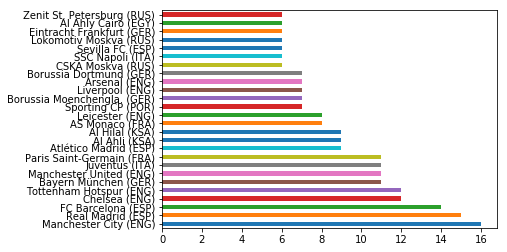

In [12]:
club_count_more_than_5 = club_count.where(lambda x : x>5).dropna()
club_count_more_than_5.plot(kind='barh', rot=0)

### 나라 별 클럽 팀 세보기

In [13]:
# club 정보에서 해당 클럽의 나라 정보 찾기
players.club.head()

0    Al Hilal (KSA)
1    Al Hilal (KSA)
2     Al Nasr (KSA)
3    Al Hilal (KSA)
4    Al Hilal (KSA)
Name: club, dtype: object

In [14]:
players['club_country'] = players.club.str.split('(').str[1].str.strip(')')
players.club_country[:10]

0    KSA
1    KSA
2    KSA
3    KSA
4    KSA
5    ESP
6    KSA
7    KSA
8    KSA
9    KSA
Name: club_country, dtype: object

In [15]:
# 정규식을 활용해 추출하는 메소드 extract()를 제공한다
# players.club.str.extract(r'([(])([A-Z]+)([)])', expand=False)

In [16]:
players.club_country.value_counts()[:10]

ENG    123
ESP     81
GER     67
ITA     58
FRA     49
RUS     36
KSA     30
MEX     23
TUR     22
POR     18
Name: club_country, dtype: int64

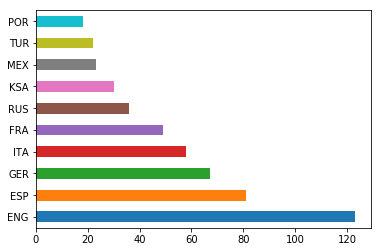

In [17]:
country_count_top_10 = players.club_country.value_counts()[:10]
country_count_top_10.plot(kind='barh')

## 참가한 선수들 중 클럽 소속 나라의 비율은 어떻게 되나

- 영국 리그에서 활동하는 선수/ 전체선수

In [18]:
clubs_country = pd.DataFrame(players.club_country.value_counts())
clubs_country.head()

,club_country
ENG,123
ESP,81
GER,67
ITA,58
FRA,49


In [19]:
clubs_country.rename(columns={'club_country':'country'}, inplace=True)
clubs_country.head()

,country
ENG,123
ESP,81
GER,67
ITA,58
FRA,49


In [24]:
# 전체 선수 수
players.id.count()

736

In [26]:
clubs_country.country.sum()

736

In [34]:
clubs_country['percent'] = clubs_country.country.map(lambda x : (x / players.id.count())*100)
clubs_country

,country,percent
ENG,123,16.711957
ESP,81,11.005435
GER,67,9.103261
ITA,58,7.880435
FRA,49,6.657609
RUS,36,4.891304
KSA,30,4.076087
MEX,23,3.125000
TUR,22,2.989130
POR,18,2.445652
